# Visualization of MovieLense 100k dataset

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm

## Part 1. Loading the data

> Note: the current approaches would consider only the graph with film ratings. No personal information regarding the users or films would be taken into account. The reasons for that are:
>   1. Simplicity. This is simpler to implement and interpret
>   2. Sufficiency. The analysis of available SOTA solutions (trained only on the similar dataset) showed that this task could be sufficiently solved using information about the graph only.   

In [12]:
# Load raw data
data = np.loadtxt('../data/raw/ml-100k/u.data', skiprows=0, delimiter='\t').astype('int32')

n_users = np.unique(data[:, 0]).size  # num of users
n_movies = np.unique(data[:, 1]).size  # num of movies

n_users, n_movies

(943, 1682)

In [13]:
# Computing adjacency matrix
adj_matrix = np.zeros((n_movies, n_users), dtype='float32')

for i in range(len(data)):
    adj_matrix[data[i,1]-1, data[i,0]-1] = data[i,2]

adj_matrix.shape

(1682, 943)

## Part 2. Visualizations

After analysing several SOTA repositories & solutions, I might conclude that there is no need in some essential preprocessing, since:
1. The data already has train/test split
2. The data is filtered & validated by creators of the dataset (see README file)

Hence, I think it's enough to perform some basic visualizations to get a better knowledge about our dataset

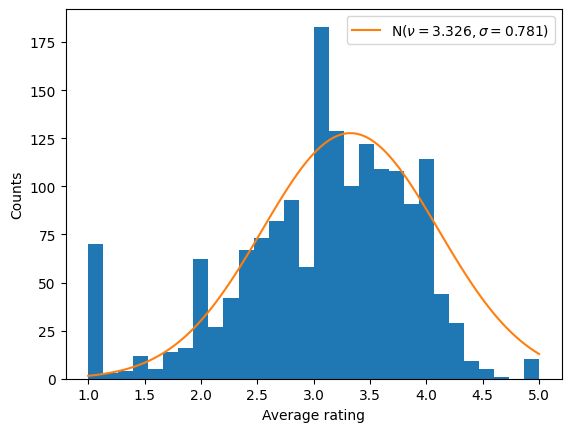

In [55]:
# Visualizing average ratings distribution
rating_sum = np.sum(adj_matrix, axis=1)
n_reviews = np.count_nonzero(adj_matrix, axis=1)
avg_rating = rating_sum / n_reviews

plt.hist(avg_rating, bins=30)
x_ticks = np.linspace(1, 5, 100)
dist_mean = np.round(np.mean(avg_rating)+0.25, 3)
dist_std = np.round(np.std(avg_rating), 3)
scale = 250
plt.plot(x_ticks, norm.pdf(x_ticks, dist_mean, dist_std)*scale, label=f'N($\\nu={dist_mean:}, \\sigma={dist_std}$)')
plt.xlabel('Average rating')
plt.ylabel('Counts')
plt.legend()
plt.savefig('../reports/figures/avg_rating_dist.png')
plt.show()


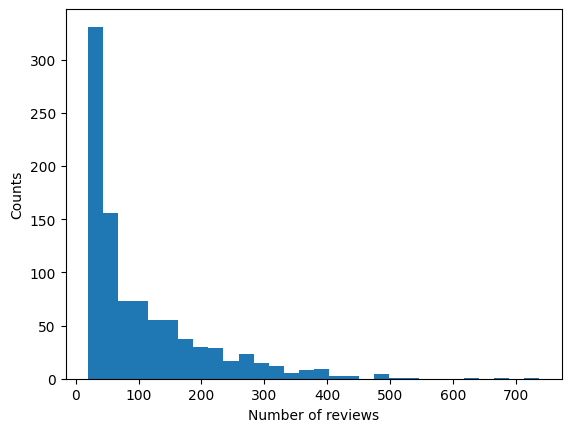

In [69]:
# Average amount of votes per person  
_, votes_per_person = np.unique(data[:, 0], return_counts=True)
plt.hist(votes_per_person, bins=30)
plt.xlabel('Number of reviews')
plt.ylabel('Counts')
plt.savefig("../reports/figures/no_of_reviews.png")

In [67]:
votes_per_person.min(), votes_per_person.max()

(20, 737)

## Part 3. Exploring the data for fun

The formal (and at least somehow) useful part is over, now let's have some fun...

First, we need to load all other data as well

In [76]:
# Load genres data
genre = pd.read_csv('../data/raw/ml-100k/u.genre', sep="|", encoding='latin-1', header=None)
genre = list(genre.iloc[:, 0])
genre

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [79]:
# Load occupation data
occupation = pd.read_csv('../data/raw/ml-100k/u.occupation', sep="|", encoding='latin-1', header=None)
occupation = list(occupation.iloc[:, 0])
occupation

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [85]:
data = pd.read_csv('../data/raw/ml-100k/u.data', sep="\t", header=None)
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [81]:
# Load the Movies data
item = pd.read_csv('../data/raw/ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
# Load the User data
user = pd.read_csv('../data/raw/ml-100k/u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Top-K most best rated movies per occupation

In [96]:
def tok_k_rating_per_occupation(k: int = 3, occupation: str = 'programmer'):
    #merge the 'data' table with 'user' table
    data_user = pd.merge(data[['user id', 'movie id', 'rating']], user[['user id', 'occupation']], on='user id')
    data_user.drop(columns = ['user id'], inplace=True)

    #merge the 'Data_User' dataframe with 'Item' dataframe to get each rating, occupation of user and movie title
    
    data_user_item = pd.merge(data_user[['movie id', 'rating', 'occupation']], item[['movie id', 'movie title']], on='movie id')
    data_user_item.drop(columns = ['movie id'], inplace=True)

    data_user_item = data_user_item[data_user_item['occupation'] == occupation]
    #group the data by occupation and movie title and sort with decreasing average ratings
    data_user_item_sorted = data_user_item.groupby(['movie title'], as_index=False)['rating'].mean().sort_values('rating', ascending=False)
    
    #group data by occupation, movie title and select top 3 movies for each occupation
    top_k_occ = data_user_item_sorted.head(k).sort_values(['movie title'], ascending=[True]).reset_index()
    top_k_occ.drop(['index'], axis=1, inplace=True)

    return top_k_occ

tok_k_rating_per_occupation(5, occupation='programmer')

,movie title,rating
0,Faithful (1996),5.0
1,Fear (1996),5.0
2,Paradise Lost: The Child Murders at Robin Hood...,5.0
3,Total Eclipse (1995),5.0
4,Trust (1990),5.0


Top-K most popular movies per occupation

In [143]:
def tok_k_popularity_per_occupation(k: int = 3, occupation: str = 'programmer'):
    #merge the 'data' table with 'user' table
    data_user = pd.merge(data[['user id', 'movie id', 'rating']], user[['user id', 'occupation']], on='user id')
    data_user.drop(columns = ['user id'], inplace=True)
    data_user = data_user[data_user['occupation'] == occupation]
    
    most_frequent_movies = pd.value_counts(data_user['movie id'])
    data_user_with_counts = pd.merge(data_user, most_frequent_movies, on='movie id')

    #merge the 'Data_User' dataframe with 'Item' dataframe to get each rating, occupation of user and movie title
    data_user_item = pd.merge(data_user_with_counts, item[['movie id', 'movie title']], on='movie id')
    data_user_item.drop(columns = ['movie id'], inplace=True)
    
    #group the data by occupation and movie title and sort with decreasing average ratings
    
    data_user_item_rating = data_user_item.groupby(['movie title'], as_index=False)['rating'].mean()
    data_user_item_concat = pd.merge(data_user_item_rating, data_user_item.drop('rating', axis=1), on='movie title')
    data_user_item_concat = data_user_item_concat.drop_duplicates()
    
    data_user_item_sorted = data_user_item_concat.sort_values('count', ascending=False)
    
    #group data by occupation, movie title and select top 3 movies for each occupation
    top_k_occ = data_user_item_sorted.head(k).reset_index()

    top_k_occ.drop(['index'], axis=1, inplace=True)
    top_k_occ.rename(columns={'count': '# of reviews'}, inplace=True)
    
    return top_k_occ

tok_k_popularity_per_occupation(7, 'writer')

,movie title,rating,occupation,# of reviews
0,Fargo (1996),3.962963,writer,27
1,Star Wars (1977),3.962963,writer,27
2,Scream (1996),3.407407,writer,27
3,"English Patient, The (1996)",3.080000,writer,25
4,Liar Liar (1997),2.760000,writer,25
5,Return of the Jedi (1983),3.560000,writer,25
6,Contact (1997),3.750000,writer,24
